# Tests on PandaPower

## Importation prod éolienne

In [1]:
import pandas as pd
import pandapower as pp
import numpy as np
from pandapower.networks import mv_oberrhein
import pandapower.plotting as plot
from pandapower.plotting.plotly import simple_plotly
import re
from decimal import Decimal
from pandapower.networks import mv_oberrhein
import os

In [2]:
if os.getcwd()[:10] == '/Users/flo':
    path = '/Users/florianhenot/Documents/3A/OEN/Projet de synthèse/Code/data_extraction/wind/outputs'
else:
    path = 'C:/Users/sebsa/Documents/Centrale Paris/3A/OEN/Projet Synthese/data/installed_capacity/Wind/Extraction The Wind Power'
wind_farms = os.listdir(path)
wind_farms

['database_AT.csv',
 'database_AT_formatted.csv',
 'database_BE.csv',
 'database_BE_formatted.csv',
 'database_BG.csv',
 'database_BG_formatted.csv',
 'database_CH.csv',
 'database_CH_formatted.csv',
 'database_CY.csv',
 'database_CY_formatted.csv',
 'database_CZ.csv',
 'database_CZ_formatted.csv',
 'database_DE.csv',
 'database_DE_formatted.csv',
 'database_DK.csv',
 'database_DK_formatted.csv',
 'database_EE.csv',
 'database_EE_formatted.csv',
 'database_FI.csv',
 'database_FI_formatted.csv',
 'database_FR.csv',
 'database_FR_formatted.csv',
 'database_GB.csv',
 'database_GB_formatted.csv',
 'database_GR.csv',
 'database_GR_formatted.csv',
 'database_HR.csv',
 'database_HR_formatted.csv',
 'database_HU.csv',
 'database_HU_formatted.csv',
 'database_IE.csv',
 'database_IE_formatted.csv',
 'database_IT.csv',
 'database_IT_formatted.csv',
 'database_LU.csv',
 'database_LU_formatted.csv',
 'database_LV.csv',
 'database_LV_formatted.csv',
 'database_MK.csv',
 'database_MK_formatted.csv',


In [25]:
test = pd.read_csv(path+'/'+'database_DE.csv', sep = ';', encoding = "ISO-8859-1")

In [26]:
test.head(10)

,Wind farm name,Total nominal power,Latitude,Longitude
0,3.4M114 prototype,"3,400 kW","53Â° 59' 28.5""","9Â° 12' 12.7"""
1,Aachen,500 kW,"50Â° 47' 26.9""","6Â° 2' 58.9"""
2,Aarbergen,225 kW,"50Â° 14' 33.9""","8Â° 4' 18.3"""
3,Abelbeck,"1,600 kW",NaN,NaN
4,AblaÃ,"16,500 kW","51Â° 13' 37.4""","12Â° 56' 48.6"""
5,Achim,"8,000 kW","53Â° 1' 39""","9Â° 4' 23.9"""
6,Achmer Vinte,"20,700 kW","52Â° 23' 24""","7Â° 56' 24"""
7,Achtrup,"6,000 kW","54Â° 47' 21""","9Â° 1' 37.8"""
8,Ackendorf,"1,500 kW","52Â° 13' 20.6""","11Â° 26' 24.3"""
9,Ackendorf/Gutenswegen,"12,000 kW","52Â° 13' 54.5""","11Â° 26' 13.7"""


In [27]:
test['Latitude'] = test['Latitude'].str.replace('å¡','°')
test['Longitude'] = test['Longitude'].str.replace('å¡','°')
test['Latitude'] = test['Latitude'].str.replace('Â°','°')
test['Longitude'] = test['Longitude'].str.replace('Â°','°')
test

,Wind farm name,Total nominal power,Latitude,Longitude
0,3.4M114 prototype,"3,400 kW","53° 59' 28.5""","9° 12' 12.7"""
1,Aachen,500 kW,"50° 47' 26.9""","6° 2' 58.9"""
2,Aarbergen,225 kW,"50° 14' 33.9""","8° 4' 18.3"""
3,Abelbeck,"1,600 kW",NaN,NaN
4,AblaÃ,"16,500 kW","51° 13' 37.4""","12° 56' 48.6"""
5,Achim,"8,000 kW","53° 1' 39""","9° 4' 23.9"""
6,Achmer Vinte,"20,700 kW","52° 23' 24""","7° 56' 24"""
7,Achtrup,"6,000 kW","54° 47' 21""","9° 1' 37.8"""
8,Ackendorf,"1,500 kW","52° 13' 20.6""","11° 26' 24.3"""
9,Ackendorf/Gutenswegen,"12,000 kW","52° 13' 54.5""","11° 26' 13.7"""


In [28]:
def formatlist(degrees):
    degrees = re.split('°|\' ',degrees)
    degrees[-1] = degrees[-1].replace('"',"")
    degrees = [float(x) for x in degrees]
    return degrees

def decimalDegree(degrees):
    degree, minute, second = degrees[0], degrees[1], degrees[2]
    return degree + (minute + second/60.)/60.

In [29]:
test['Latitude'] = test['Latitude'].astype(str)
test['Longitude'] = test['Longitude'].astype(str)
test['Longitude'] = test['Longitude'].apply(lambda row: formatlist(row))
test['Latitude'] = test['Latitude'].apply(lambda row: formatlist(row))
test['longlat'] = test['Latitude'].apply (lambda row: len(row))
test['longlong'] = test['Longitude'].apply (lambda row: len(row))
test = test.loc[test['longlat'] == 3]

In [30]:
test['Longitude'] = test['Longitude'].apply(lambda row: decimalDegree(row))
test['Latitude'] = test['Latitude'].apply(lambda row: decimalDegree(row))

In [31]:
#del test['longlat'], test['longlong']
test.to_csv(path + '/formated')

## Test Visualisation

In [10]:
network = pp.create_empty_network()

In [11]:
coord1 = (50.050371, 2.978700)[::-1]
coord2 = (49.838145, 2.825777)[::-1]
coord3 = (48.868504, 2.441685)[::-1]
coord4 = (49.218184, 4.078610)[::-1]
coord5 = (42.522918, 3.036108)[::-1]
coord6 = (45.912394, 6.869214)[::-1]
coord7 = (43.693737, 7.246635)[::-1]
coord8 = (43.407901, -1.515821)[::-1]

In [12]:
bus1 = pp.create_bus(network, name=test["Wind farm name"][0], vn_kv=110, type="b", geodata = coord1)
bus2 = pp.create_bus(network, name=test["Wind farm name"][1], vn_kv=110, type="b", geodata = coord2)
bus3 = pp.create_bus(network, name='Paname', vn_kv=110, type="b", geodata = coord3)
bus4 = pp.create_bus(network, name='Reims', vn_kv=110, type="b", geodata = coord4)
bus5 = pp.create_bus(network, name='Perpi', vn_kv=110, type="b", geodata = coord5)
bus6 = pp.create_bus(network, name='Cham', vn_kv=110, type="b", geodata = coord6)
bus7 = pp.create_bus(network, name='Nice', vn_kv=110, type="b", geodata = coord7)
bus8 = pp.create_bus(network, name='Biarritz', vn_kv=110, type="b", geodata = coord8)
network.bus

,name,vn_kv,type,zone,in_service
0,Amel,110.0,b,None,True
1,Antwerpen BASF,110.0,b,None,True
2,Paname,110.0,b,None,True
3,Reims,110.0,b,None,True
4,Perpi,110.0,b,None,True
5,Cham,110.0,b,None,True
6,Nice,110.0,b,None,True
7,Biarritz,110.0,b,None,True


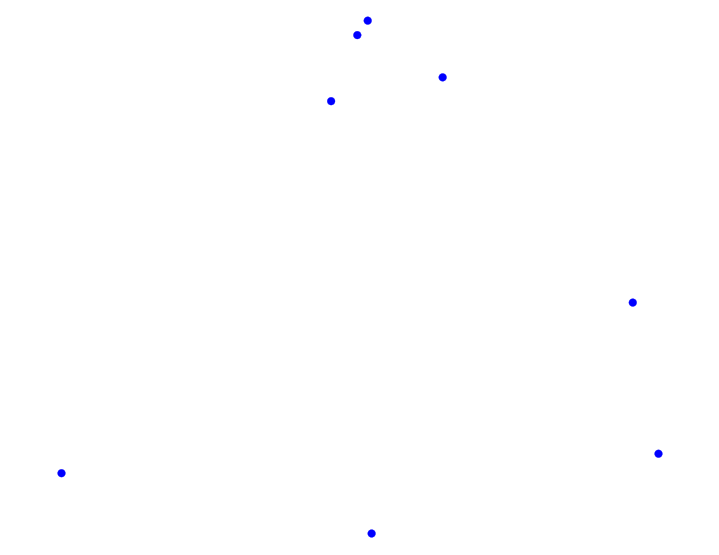

In [13]:
plot.simple_plot(network, bus_size=0.7)

## Importation multiple des parcs

In [35]:
test['Total nominal power'] = test['Total nominal power'].astype(str).str.extract('(\d+)').astype(float)
test.loc[test['Total nominal power'] >= 10]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,Wind farm name,Total nominal power,Latitude,Longitude,longlat,longlong
1,Aachen,500.0,50.790806,6.049694,3,3
2,Aarbergen,225.0,50.242750,8.071750,3,3
4,AblaÃ,16.0,51.227056,12.946833,3,3
6,Achmer Vinte,20.0,52.390000,7.940000,3,3
9,Ackendorf/Gutenswegen,12.0,52.231806,11.437139,3,3
15,Aderstedt II,25.0,51.780028,11.694639,3,3
16,Adlergrund 500,72.0,54.817972,14.095000,3,3
17,Adlergrund GAP,155.0,54.820000,14.130000,3,3
18,Adlerhorst,12.0,54.527889,9.186917,3,3
24,Ahaus,500.0,52.076611,7.008194,3,3


In [36]:
test.loc[test['Total nominal power'] >= 10]['Total nominal power'].sum()

371908.0

In [37]:
windfarmsnames = test['Wind farm name'].tolist()

In [38]:
farms = {}
for x in windfarmsnames:
    line_to_enter = test.loc[test['Wind farm name'] == x]
    farms[x] = [line_to_enter['Total nominal power'].item(), line_to_enter['Latitude'].item(), line_to_enter['Longitude'].item()]

In [39]:
network = pp.create_empty_network()
for x in farms.keys():
    pp.create_bus(network, name=x, vn_kv=110, type="b", geodata = (farms[x][2], (farms[x][1])))

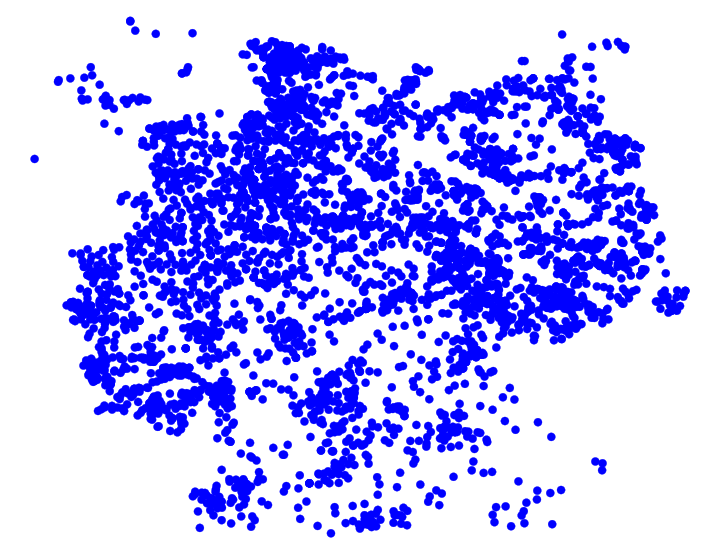

In [40]:
a = plot.simple_plot(network, bus_size=0.7)

In [41]:
a